In [84]:
import numpy as np
from matplotlib import pyplot as plt
from time import time

In [85]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.manifold import *

In [140]:
D = np.load("./distance_matrix.npy")
S = 0.5 * (D + D.transpose())
A = 0.5 * (D - D.transpose())

clustering = AgglomerativeClustering(n_clusters=10, linkage='average', affinity='precomputed')
clustering.fit_predict(S)

array([6, 6, 3, 3, 5, 9, 4, 0, 1, 1, 8, 2, 2, 2, 0, 0, 0, 1, 7, 0])

In [141]:
y = []
for i in range(10):
    y.extend([i, i])
print(y)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]


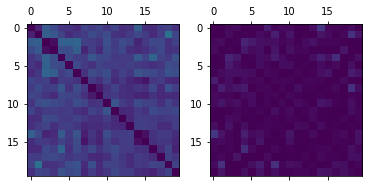

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(S, vmin=0, vmax=1)
ax2.matshow(np.abs(A), vmin=0, vmax=1)
plt.show()

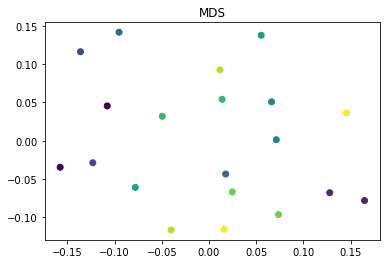

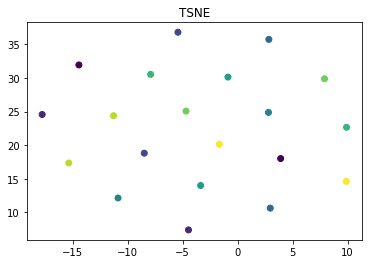

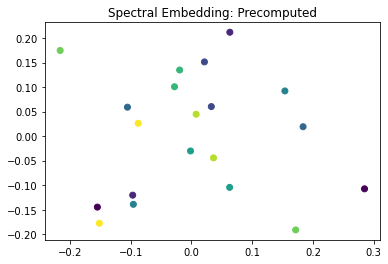

In [143]:
mds = MDS(dissimilarity='precomputed')
tsne = TSNE(metric='precomputed')
specem1 = SpectralEmbedding(affinity='precomputed')

X = mds.fit_transform(S)
plt.figure()
plt.title("MDS")
plt.scatter(*X.transpose(), c=y)
plt.show()

X = tsne.fit_transform(S)
plt.figure()
plt.title("TSNE")
plt.scatter(*X.transpose(), c=y)
plt.show()

X = specem1.fit_transform(S)
plt.figure()
plt.title("Spectral Embedding: Precomputed")
plt.scatter(*X.transpose(), c=y)
plt.show()

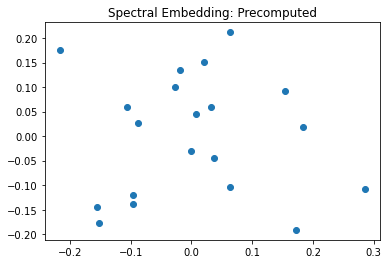

In [144]:
X = specem1.fit_transform(S)
plt.figure()
plt.title("Spectral Embedding: Precomputed")
plt.scatter(*X.transpose())
plt.show()

In [145]:
for i in range(10):
    plt.figure()
    plt.imshow

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Computing embedding
Done.
ward :	0.00s
average :	0.00s
complete :	0.00s
single :	0.00s


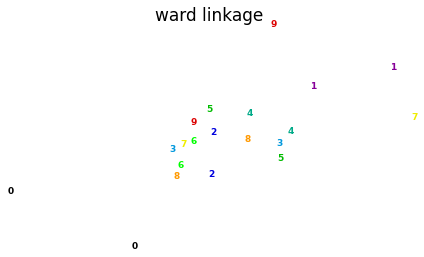

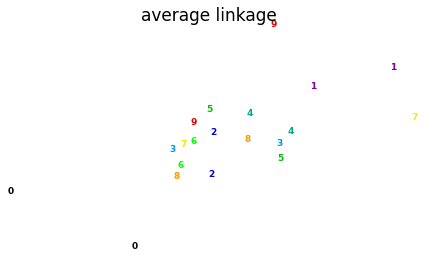

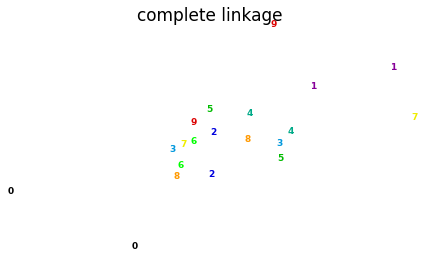

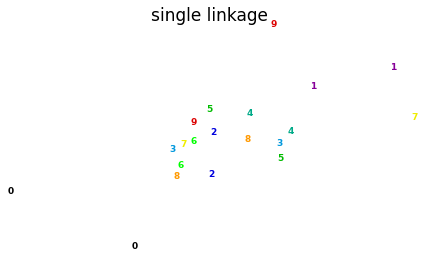

In [151]:
#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
# X_red = SpectralEmbedding(affinity='precomputed').fit_transform(S)
X_red = MDS(dissimilarity='precomputed').fit_transform(S)
# X_red = TSNE(metric='precomputed').fit_transform(S)

print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    clustering.fit(X_red)
    t0 = time()
    print("%s :\t%.2fs" % (linkage, time() - t0))
    plot_clustering(S, y, "%s linkage" % linkage)


plt.show()

In [167]:
np.save('newfile.npy', {"D": D, "y": y}, allow_pickle=True)

In [168]:
data = np.load('newfile.npy', allow_pickle=True)

In [184]:
with open('./newfile.pickle', 'wb') as f:
    pickle.dump((S, y), f)
    
with open('./newfile.pickle', 'rb') as f:
    data = pickle.load(f)

In [153]:
import pickle